***

## **Experiment 10: Social Proximity and Tie Strength Analysis**

In this experiment, we aim to evaluate the **strength of social ties** among users in the Steam Community by measuring the **friend overlap** between connected users. Specifically, we analyze how the overlap varies across different types of user pairs:

- **Cheater-Cheater pairs**: Both users have been flagged as cheaters.
- **Legit-Legit pairs**: Both users are legitimate players with no cheating history.
- **Cheater-Legit pairs**: One user is a cheater, and the other is a legitimate player.

### **Objective**

- **Assess whether cheaters tend to have stronger social ties with other cheaters compared to legitimate players.**
- **Determine if there is a significant difference in tie strength between Cheater-Cheater, Legit-Legit, and Cheater-Legit pairs.**

### **Methodology**

1. **Friend Overlap Calculation**: For each pair of connected users (nodes), we calculate the **friend overlap** as a measure of tie strength.

   - **Friend Overlap Formula**:

     $$
     \text{Friend Overlap} = \frac{| \Gamma(u) \cap \Gamma(v) |}{| \Gamma(u) \cup \Gamma(v) |}
     $$

     where:
     - $\Gamma(u)$ is the set of friends (neighbors) of user $ u $ (excluding $ v $).
     - $\Gamma(v)$ is the set of friends of user $ v $ (excluding $ u $).
     - $| \cdot |$ denotes the cardinality of the set.
     - The overlap ranges from **0** (no common friends) to **1** (all friends are common).

2. **Pair Type Identification**: Based on the **`'status'`** attribute of each user (either **`'Cheater'`** or **`'Legit'`**), we categorize each pair:

   - **Cheater-Cheater**
   - **Legit-Legit**
   - **Cheater-Legit**

3. **Data Aggregation**: We collect the friend overlap values and corresponding pair types for all edges in the network, excluding nodes with `'Un-Processed'` status.

4. **Statistical Analysis**:

   - **Descriptive Statistics**: Compute summary statistics (mean, median, standard deviation) of friend overlap for each pair type.
   - **Visualization**: Create histograms and violin plots to visualize the distribution of friend overlap across pair types.
   - **Hypothesis Testing**: Use statistical tests (e.g., Kolmogorov-Smirnov test) to determine if differences between distributions are statistically significant.

### **Expected Insights**

- **Higher Overlap Among Cheaters**: If cheaters tend to have higher friend overlap with other cheaters, it suggests that they form **stronger or tighter-knit communities**.
- **Differences in Tie Strength**: Significant differences in overlap distributions between pair types may indicate **homophily** (preference for similar others) and social clustering within the network.
- **Propagation of Cheating Behavior**: Stronger ties among cheaters could facilitate the **spread of cheating behavior** through social influence.

### **Significance of the Experiment**

Understanding the social structures and tie strengths within online gaming communities provides valuable insights into:

- **Community Dynamics**: How social relationships influence player behavior.
- **Cheating Propagation Mechanisms**: Identifying whether close-knit networks contribute to the spread of undesirable behaviors.
- **Mitigation Strategies**: Informing the development of interventions to **disrupt the networks** of cheaters and reduce the prevalence of cheating.

By quantitatively analyzing the friend overlap and comparing it across different user pair types, we aim to shed light on the **social underpinnings** of cheating behavior in online gaming networks.

***

# Step 1: Import Libraries and Load the Graph

We'll import the necessary libraries and load the graph using the same functions and variable names as Artur did in his notebook.

In [30]:
import pandas
import networkx as nx
import pickle
import matplotlib.pyplot as plt
import numpy as np
import collections

from graph_generation import get_vac_graph_graphml

import seaborn as sns
import pandas as pd
from scipy.stats import ks_2samp

In [15]:
G = get_vac_graph_graphml()

print(f"Number of nodes in the graph: {len(G.nodes())}")

Number of nodes in the graph: 4775356


# Step 2: Verify Node Attributes

Ensure that each node in the graph has the `'status'` attribute. Artur accessed node attributes using `G.nodes[n]['status']`.

In [16]:
missing_status_nodes = [n for n in G.nodes() if 'status' not in G.nodes[n]]
print(f"Number of nodes without 'status' attribute: {len(missing_status_nodes)}")

Number of nodes without 'status' attribute: 0


# Step 3: Define the Friend Overlap Function

We'll define a function to calculate the friend overlap between two nodes, consistent with the conventions used in Artur's code.

In [17]:
def friend_overlap(G, u, v):
    """
    Calculate the friend overlap between two nodes u and v in graph G.
    """
    neighbors_u = set(G.neighbors(u)) - {v}
    neighbors_v = set(G.neighbors(v)) - {u}

    intersection = neighbors_u & neighbors_v
    union = neighbors_u | neighbors_v

    if len(union) == 0:
        return 0.0
    else:
        return len(intersection) / len(union)


# Step 4: Calculate Friend Overlap for Each Edge

We'll iterate over each edge in the graph and calculate the friend overlap and identify the pair type based on the `'status'` attribute.

In [18]:
overlaps = []
pair_types = []

edges = G.edges()

edge_count = 0
for u, v in edges:
    edge_count += 1
    if 'status' in G.nodes[u] and 'status' in G.nodes[v]:
        status_u = G.nodes[u]['status']
        status_v = G.nodes[v]['status']
        if status_u == 'Un-Processed' or status_v == 'Un-Processed':
            continue
        overlap = friend_overlap(G, u, v)
        overlaps.append(overlap)

        if status_u == 'Cheater' and status_v == 'Cheater':
            pair_types.append('Cheater-Cheater')
        elif status_u == 'Legit' and status_v == 'Legit':
            pair_types.append('Legit-Legit')
        elif (status_u == 'Cheater' and status_v == 'Legit') or (status_u == 'Legit' and status_v == 'Cheater'):
            pair_types.append('Cheater-Legit')
        else:
            pair_types.append('Other')
    else:
        continue
    if edge_count % 1000000 == 0:
        print(f"Processed {edge_count} edges")

print("Finished processing edges.")


Finished processing edges.


# Step 5: Create a DataFrame to Store the Results

In [19]:
print({tag for tag in pair_types})

df = pd.DataFrame({
    'Overlap': overlaps,
    'PairType': pair_types
})

df.head(n=15)

{'Cheater-Cheater', 'Cheater-Legit', 'Legit-Legit'}


,Overlap,PairType
0,0.076923,Legit-Legit
1,0.125000,Legit-Legit
2,0.020548,Legit-Legit
3,0.000000,Legit-Legit
4,0.000000,Legit-Legit
5,0.013793,Legit-Legit
6,0.000000,Legit-Legit
7,0.000000,Legit-Legit
8,0.000000,Legit-Legit
9,0.003774,Legit-Legit


# Step 6: Analyze the Overlap Data

Compute summary statistics for each pair type.

In [20]:
df_filtered = df[df['PairType'].isin(['Cheater-Cheater', 'Legit-Legit', 'Cheater-Legit'])]

group_stats = df_filtered.groupby('PairType')['Overlap'].describe()
print(group_stats)


                   count      mean       std  min  25%       50%       75%  \
PairType                                                                     
Cheater-Cheater   2172.0  0.015414  0.032778  0.0  0.0  0.002174  0.015393   
Cheater-Legit    16990.0  0.014187  0.030901  0.0  0.0  0.002237  0.013889   
Legit-Legit      83037.0  0.018576  0.039039  0.0  0.0  0.003534  0.019802   

                      max  
PairType                   
Cheater-Cheater  0.333333  
Cheater-Legit    0.666667  
Legit-Legit      1.000000  


# Step 7: Visualize the Distributions

## Histogram

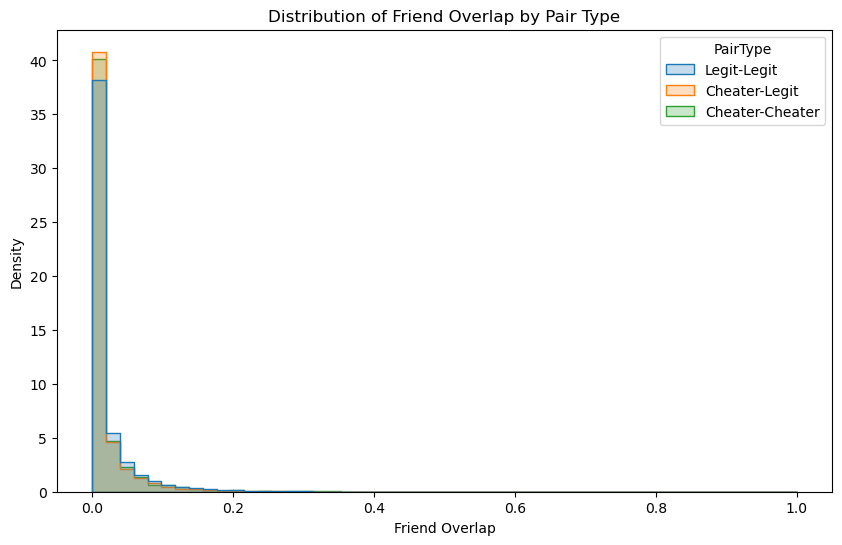

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='Overlap', hue='PairType', bins=51, kde=False, element='step', stat='density', common_norm=False, legend=True)
plt.title('Distribution of Friend Overlap by Pair Type')
plt.xlabel('Friend Overlap')
plt.ylabel('Density')
plt.show()

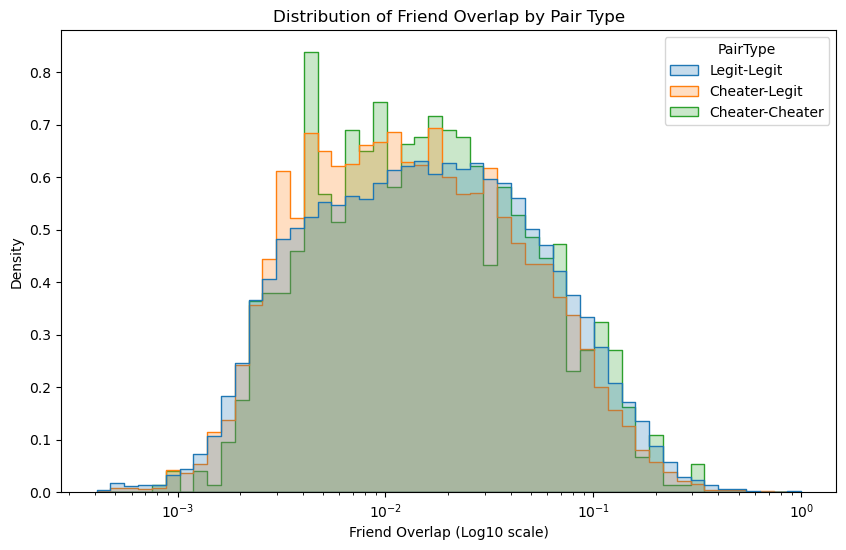

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='Overlap', hue='PairType', bins=51, kde=False, element='step', stat='density', common_norm=False, legend=True, log_scale=True)
plt.title('Distribution of Friend Overlap by Pair Type')
plt.xlabel('Friend Overlap (Log10 scale)')
plt.ylabel('Density')
plt.show()

## Violin Plot

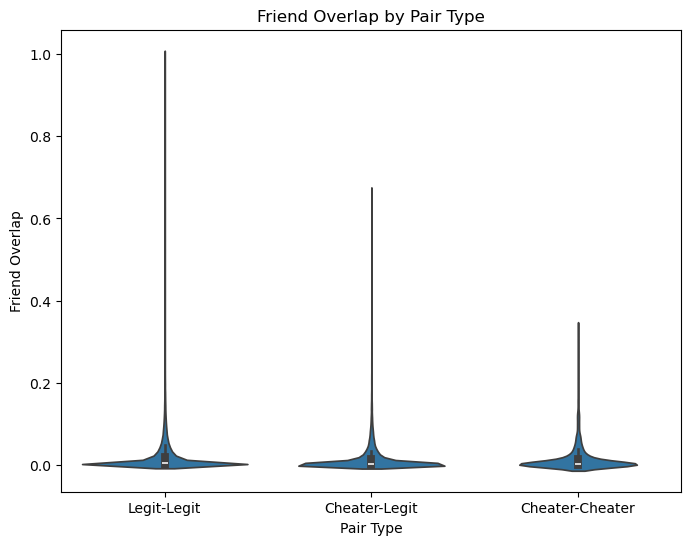

In [35]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_filtered, x='PairType', y='Overlap')
plt.title('Friend Overlap by Pair Type')
plt.xlabel('Pair Type')
plt.ylabel('Friend Overlap')
plt.show()

# Step 8: Statistical Testing

Perform statistical tests to determine if differences in overlap are significant between pair types.

In [36]:
overlap_cheater_cheater = df_filtered[df_filtered['PairType'] == 'Cheater-Cheater']['Overlap']
overlap_legit_legit = df_filtered[df_filtered['PairType'] == 'Legit-Legit']['Overlap']
overlap_cheater_legit = df_filtered[df_filtered['PairType'] == 'Cheater-Legit']['Overlap']

ks_stat, p_value = ks_2samp(overlap_cheater_cheater, overlap_legit_legit)
print("KS Test between Cheater-Cheater and Legit-Legit pairs:")
print(f"KS Statistic: {ks_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Result: The distributions are statistically significantly different.")
else:
    print("Result: No significant difference between the distributions.")

KS Test between Cheater-Cheater and Legit-Legit pairs:
KS Statistic: 0.06605816803891656
P-value: 1.7822715013680223e-08
Result: The distributions are statistically significantly different.


In [37]:
ks_stat, p_value = ks_2samp(overlap_cheater_legit, overlap_cheater_cheater)
print("KS Test between Cheater-Legit and Cheater-Cheater pairs:")
print(f"KS Statistic: {ks_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Result: The distributions are statistically significantly different.")
else:
    print("Result: No significant difference between the distributions.")

KS Test between Cheater-Legit and Cheater-Cheater pairs:
KS Statistic: 0.017434749289203744
P-value: 0.5954524678755949
Result: No significant difference between the distributions.


In [38]:
ks_stat, p_value = ks_2samp(overlap_cheater_legit, overlap_legit_legit)
print("KS Test between Cheater-Legit and Legit-Legit pairs:")
print(f"KS Statistic: {ks_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Result: The distributions are statistically significantly different.")
else:
    print("Result: No significant difference between the distributions.")

KS Test between Cheater-Legit and Legit-Legit pairs:
KS Statistic: 0.057328455160181147
P-value: 9.849897192728216e-41
Result: The distributions are statistically significantly different.


# Notes on Consistency with Artur's Notebook

1. **Graph Loading:** We've used the same function `get_vac_graph_graphml_sample()` to load the graph G, as Artur did.
2. **Node Attribute Access:** We access node attributes using `G.nodes[n]['status']`, consistent with Artur's method.
3. **Variable Names:** We've kept variable names like `G`, `edges`, and functions consistent with those used in Artur's code.
4. **Library Imports:** We've imported the same libraries and added additional ones needed for this analysis.